# Animation in Jupyter Notebooks

## Create the Background Frame

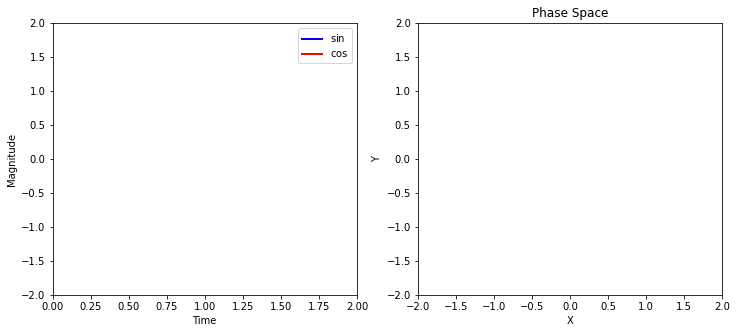

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes
fig = plt.figure(figsize=(12, 5))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

# Set up the subplots as needed
ax1.set_xlim(0, 2)
ax1.set_ylim(-2, 2)
ax1.set_xlabel("Time")
ax1.set_ylabel("Magnitude")

ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Phase Space')

# Create objects that will change in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)
line2, = ax1.plot([], [], 'r', lw=2)
pt1, = ax2.plot([], [], 'g.', ms=20)
line3, = ax2.plot([], [], 'y', lw=2)

ax1.legend(['$\sin$', '$\cos$'])

## Define a Function to Draw Each Frame

In [2]:
def drawframe(n):
    x = np.linspace(0, 2, 1000)
    y1 = np.sin(2 * np.pi * (x - 0.01 * n))
    y2 = np.cos(2 * np.pi * (x - 0.01 * n))
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    line3.set_data(y1[0:50], y2[0:50])
    pt1.set_data(y1[0], y2[0])
    txt_title.set_text(f'Frame = {n:4d}')
    return line1, line2

## Create the Animation Object

In [3]:
from matplotlib import animation

anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)

## Render the Animation

In [6]:
from IPython.display import HTML

HTML(anim.to_jshtml())

# anim.save('anim01-01.mp4', writer='ffmpeg', fps=15)
# Video('anim01-01.mp4')